In [1]:
import pandas as pd

C:\Users\Asus\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv('crop_yield.csv')

In [3]:
print(data.isnull().sum())

Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [4]:
data.drop_duplicates(inplace=True)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

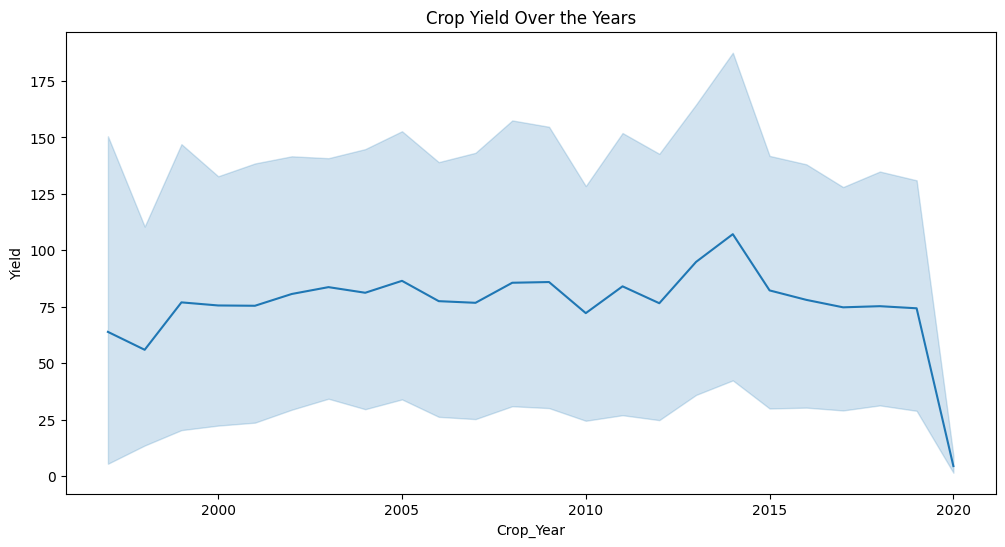

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Yield', data=data)
plt.title('Crop Yield Over the Years')
plt.show()

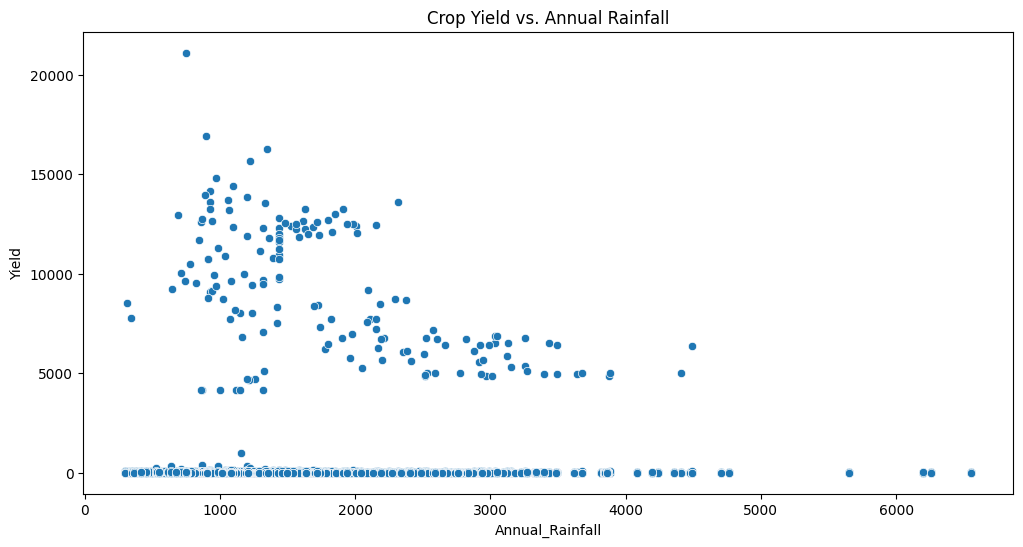

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=data)
plt.title('Crop Yield vs. Annual Rainfall')
plt.show()

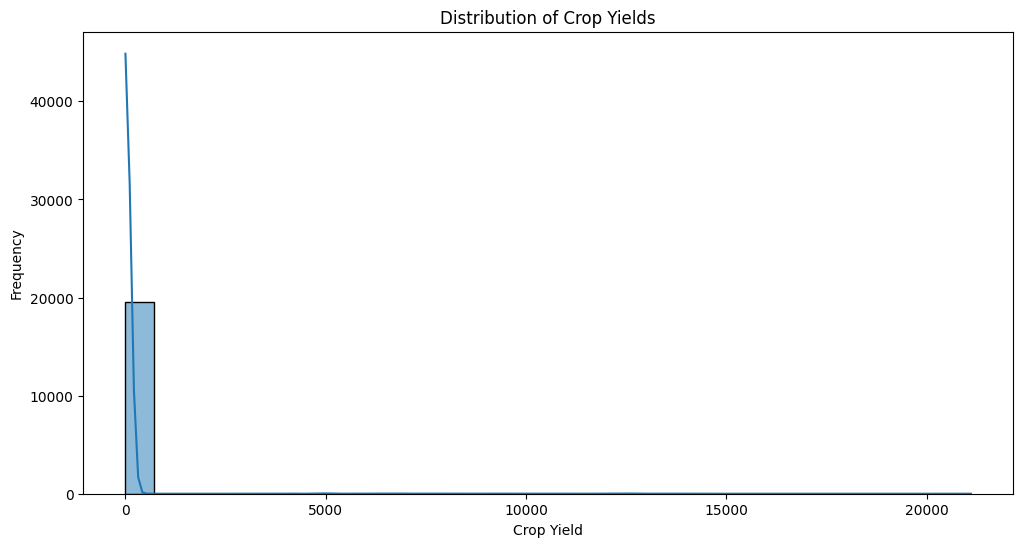

In [8]:
# Crop Yield Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Yield'], bins=30, kde=True)
plt.title('Distribution of Crop Yields')
plt.xlabel('Crop Yield')
plt.ylabel('Frequency')
plt.show()

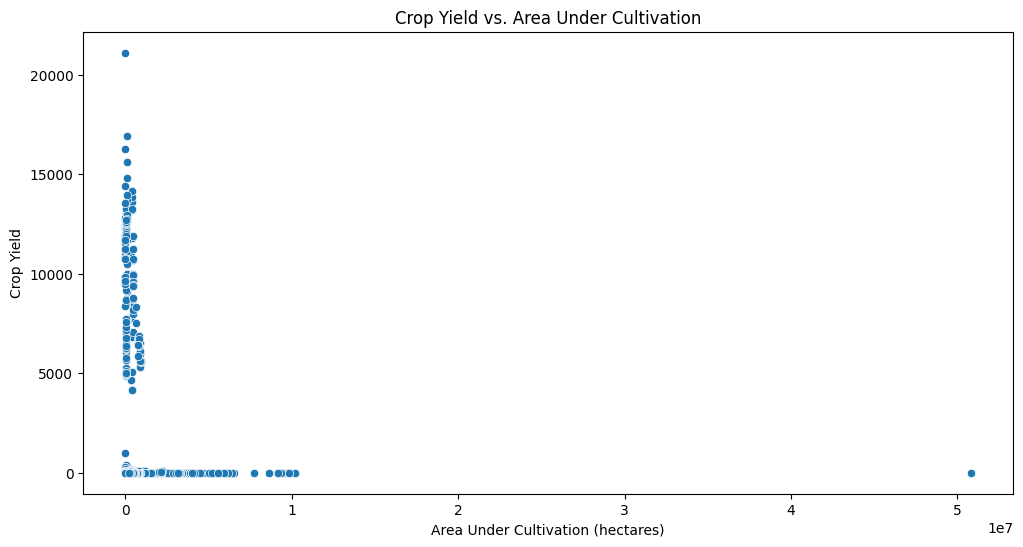

In [9]:
# Crop Yield vs. Area Under Cultivation
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Area', y='Yield', data=data)
plt.title('Crop Yield vs. Area Under Cultivation')
plt.xlabel('Area Under Cultivation (hectares)')
plt.ylabel('Crop Yield')
plt.show()


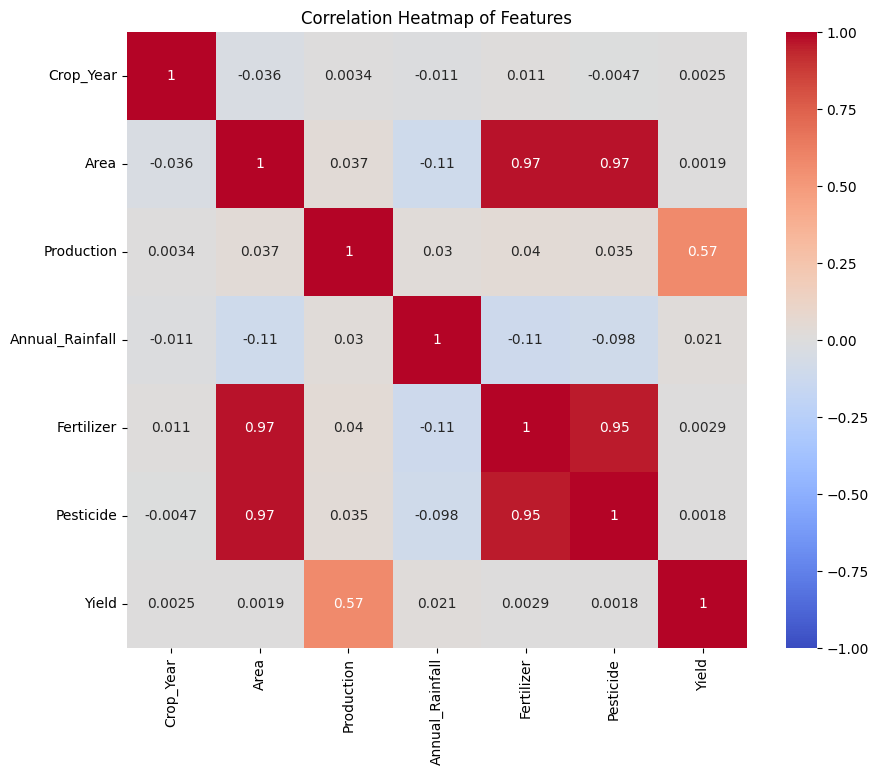

In [10]:
import numpy as np
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Features')
plt.show()

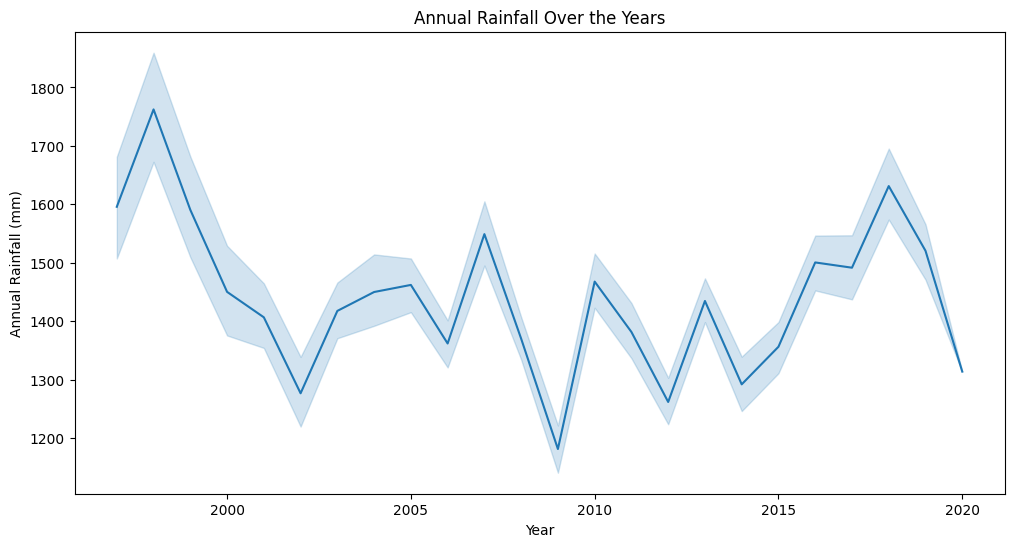

In [11]:
# Annual Rainfall Over the Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Crop_Year', y='Annual_Rainfall', data=data)
plt.title('Annual Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14232\1363791805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_yield.values, y=state_yield.index, palette='viridis')


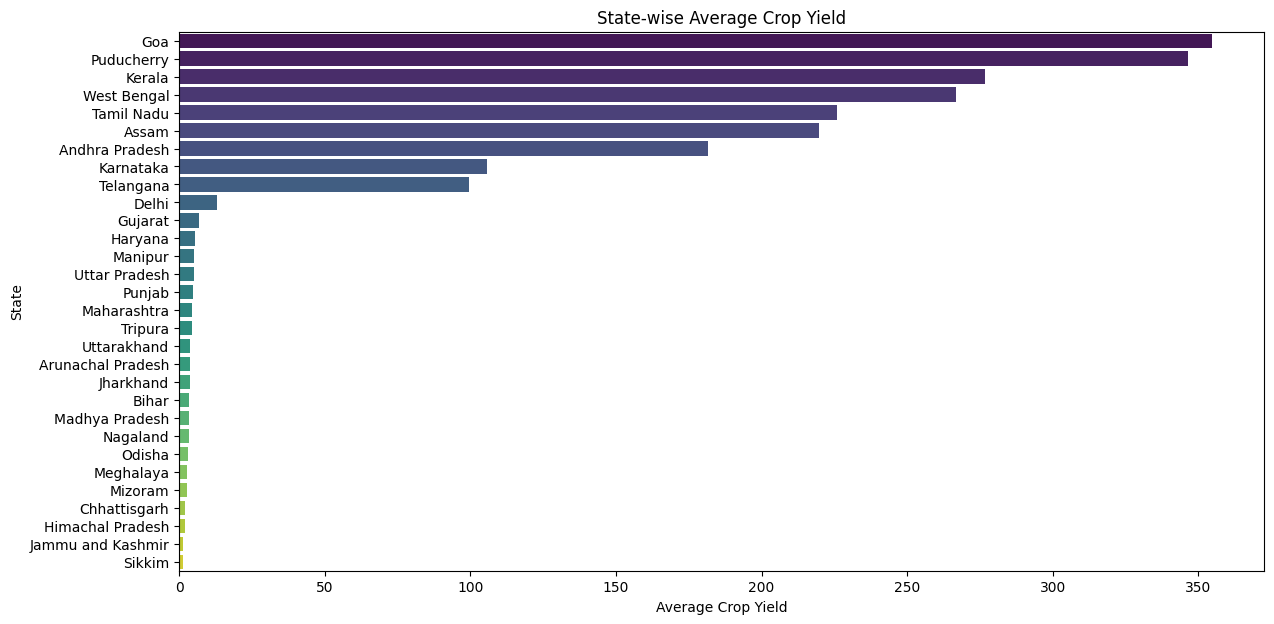

In [12]:
# State-wise Crop Yield Comparison
plt.figure(figsize=(14, 7))
state_yield = data.groupby('State')['Yield'].mean().sort_values(ascending=False)
sns.barplot(x=state_yield.values, y=state_yield.index, palette='viridis')
plt.title('State-wise Average Crop Yield')
plt.xlabel('Average Crop Yield')
plt.ylabel('State')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14232\3751419803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Yield', data=data, palette='Set2')


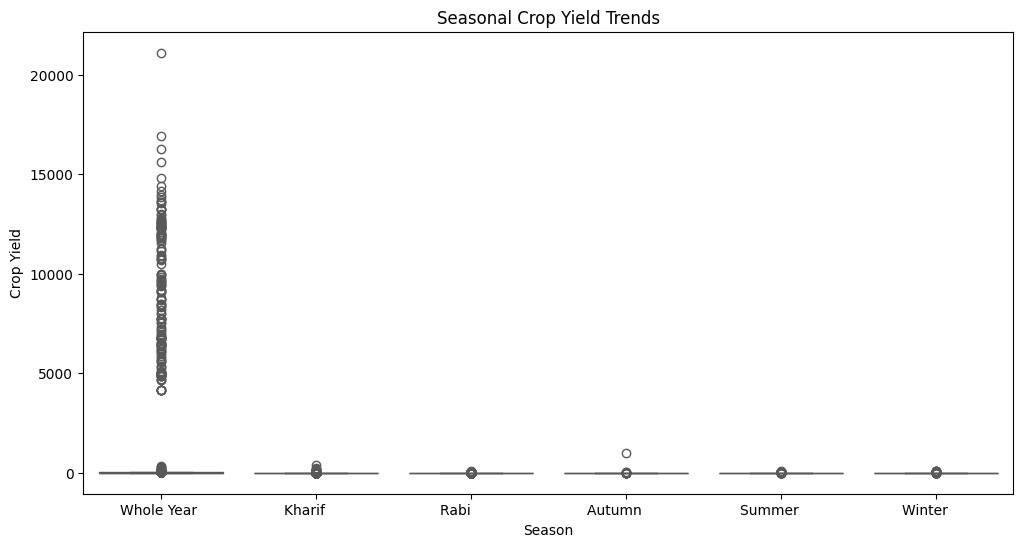

In [13]:
# Seasonal Crop Yield Trends
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Yield', data=data, palette='Set2')
plt.title('Seasonal Crop Yield Trends')
plt.xlabel('Season')
plt.ylabel('Crop Yield')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target variable
X = data[['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']]
y = data['Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 839.7701589730357


In [16]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


In [17]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  14.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  13.7s
[CV] END max_depth=10, min_sam

In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

R² Score: 0.11984668912796226


In [19]:
import plotly.express as px

fig = px.scatter(data, x='Annual_Rainfall', y='Yield', color='Season', title='Crop Yield vs. Annual Rainfall')
fig.show()

C:\Users\Asus\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


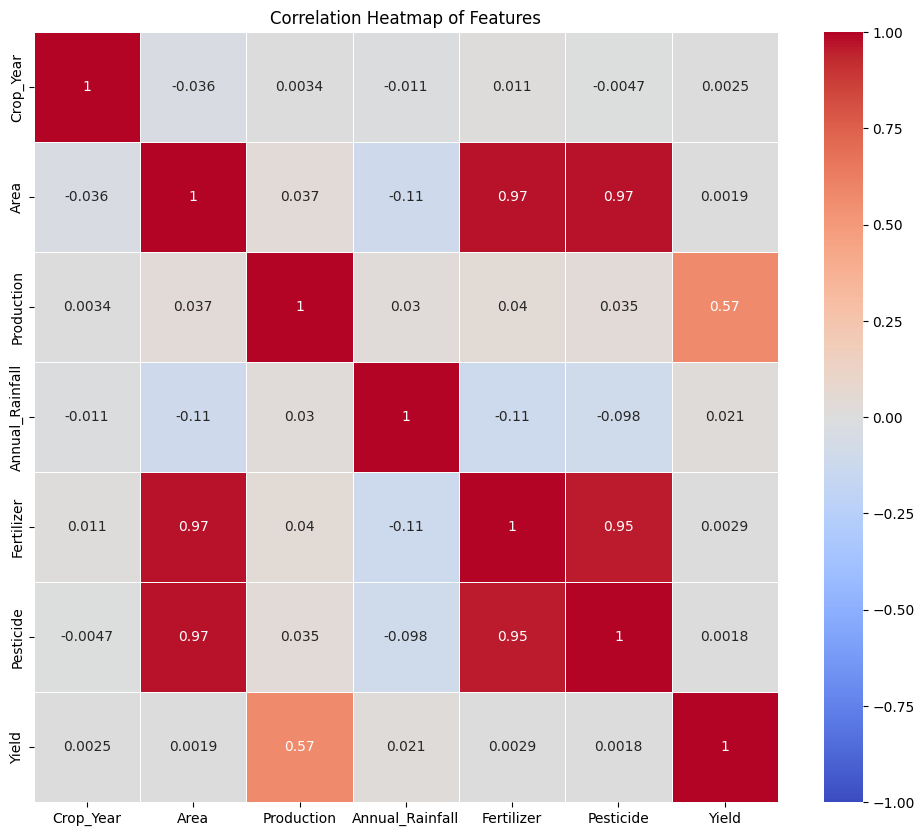

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_14232\2222034344.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




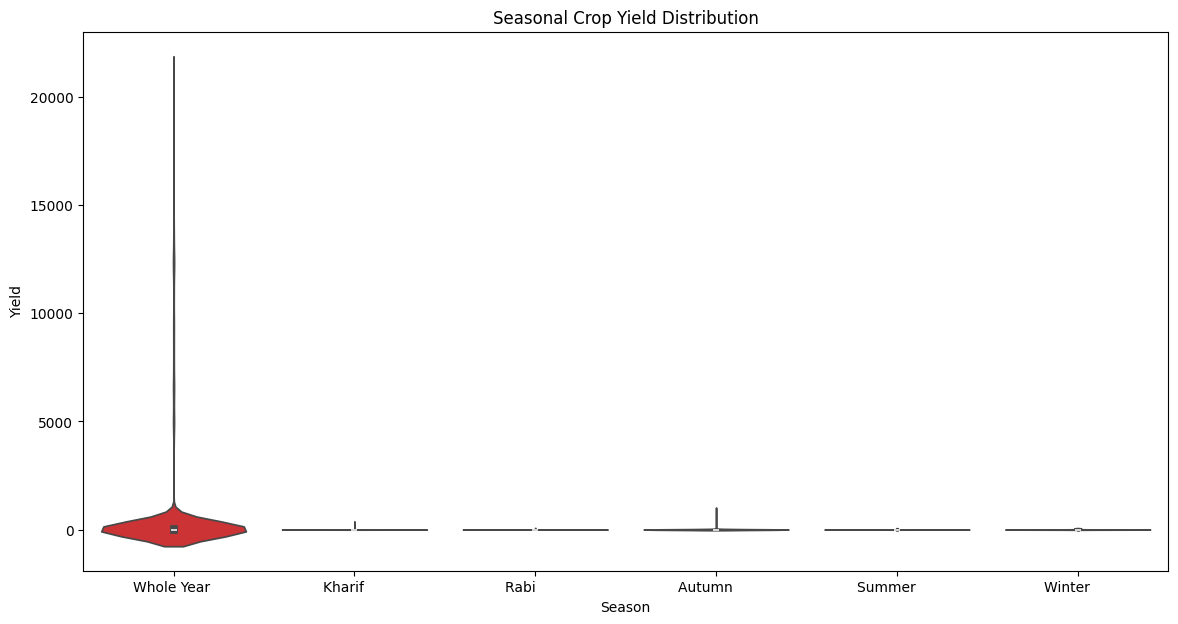

In [21]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='Season', y='Yield', data=data, palette='Set1')
plt.title('Seasonal Crop Yield Distribution')
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



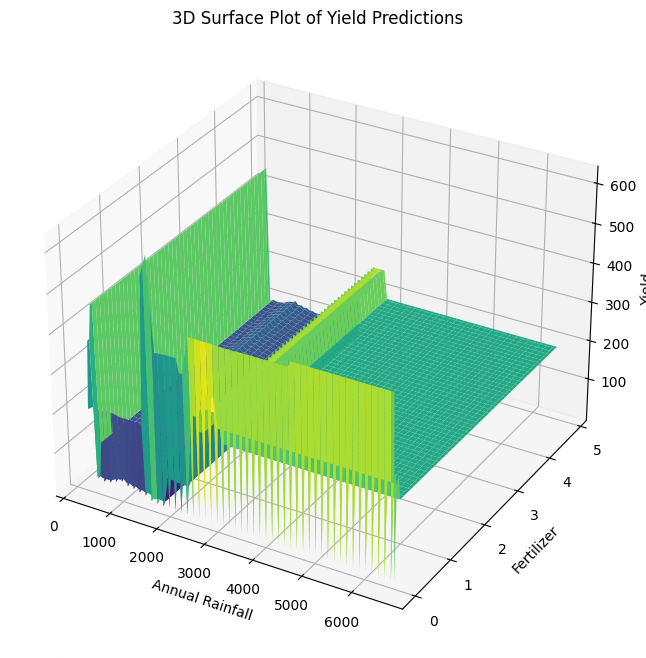

In [23]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for x and y
x = np.linspace(data['Annual_Rainfall'].min(), data['Annual_Rainfall'].max(), 100)
y = np.linspace(data['Fertilizer'].min(), data['Fertilizer'].max(), 100)
X, Y = np.meshgrid(x, y)

# Create arrays for Pesticide and Area with the same shape as X and Y
Pesticide = np.full(X.shape, np.mean(data['Pesticide']))
Area = np.full(X.shape, np.mean(data['Area']))

# Predict Z values
Z = model.predict(np.c_[X.ravel(), Y.ravel(), Pesticide.ravel(), Area.ravel()])
Z = Z.reshape(X.shape)

# Plot surface
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('Annual Rainfall')
ax.set_ylabel('Fertilizer')
ax.set_zlabel('Yield')
ax.set_title('3D Surface Plot of Yield Predictions')
plt.show()


In [25]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/a2/48/d5da8591891327b0faf08179d420fba3893c6134bdd449497c5329e4cb01/xgboost-2.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/124.9 MB 550.5 kB/s eta 0:03:47
   ---------------------------------------- 0.1/124.9 MB 585.1 kB/s eta 0:03:34
   ---------------------------------------- 0.1/124.9 MB 595.3 kB/s eta 0:03:30
   ---------------------------------------- 0.1/124.9 MB 532.5 kB/s eta 0:03:55
   ---------------------------------------- 0.2/124.9 MB 546.6 kB/s eta 0:03:49
   -------------------------------------

In [26]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validated RMSE: {-scores.mean()**0.5}')

Cross-Validated RMSE: nan


C:\Users\Asus\AppData\Local\Temp\ipykernel_14232\1196051434.py:6: RuntimeWarning:

invalid value encountered in scalar power



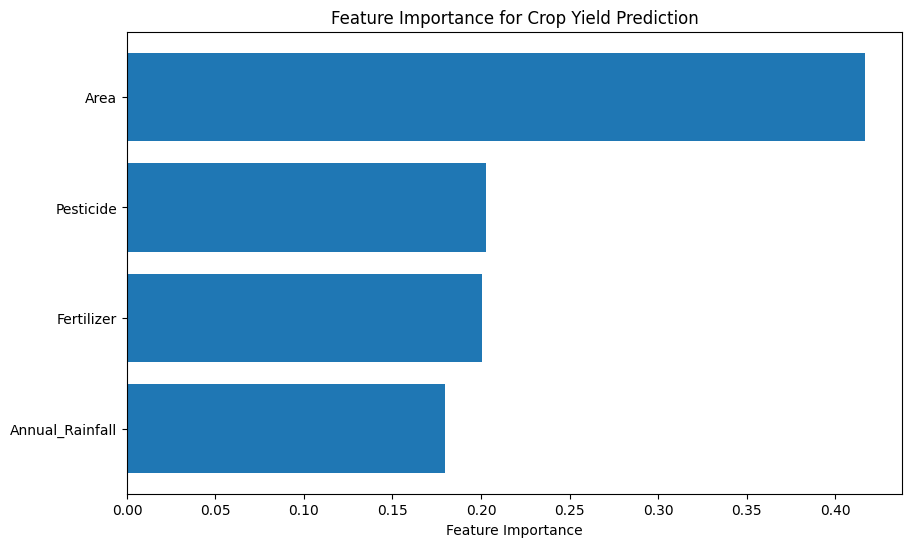

In [27]:
importances = model.feature_importances_
feature_names = ['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area']
sorted_indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Crop Yield Prediction')
plt.show()

In [30]:
import pandas as pd

# Convert to DataFrame to keep feature names
X_scenario_df = pd.DataFrame(X_scenario, columns=['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area'])
Z_scenario = model.predict(X_scenario_df)

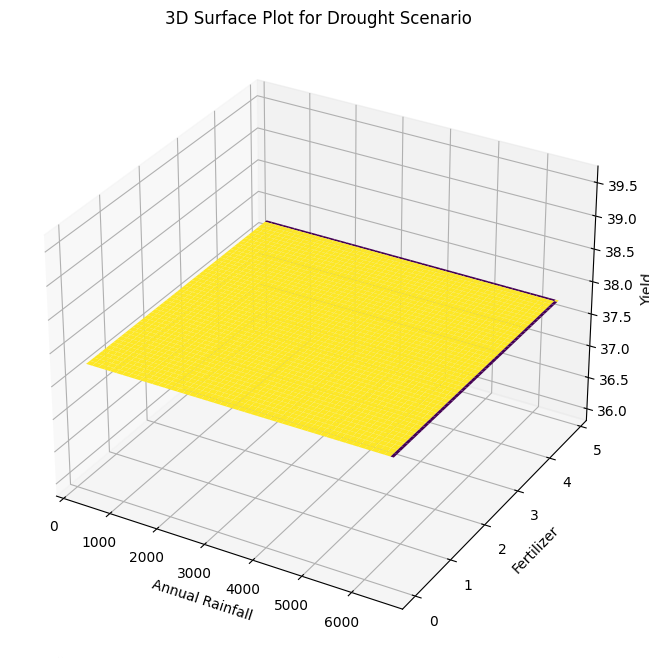

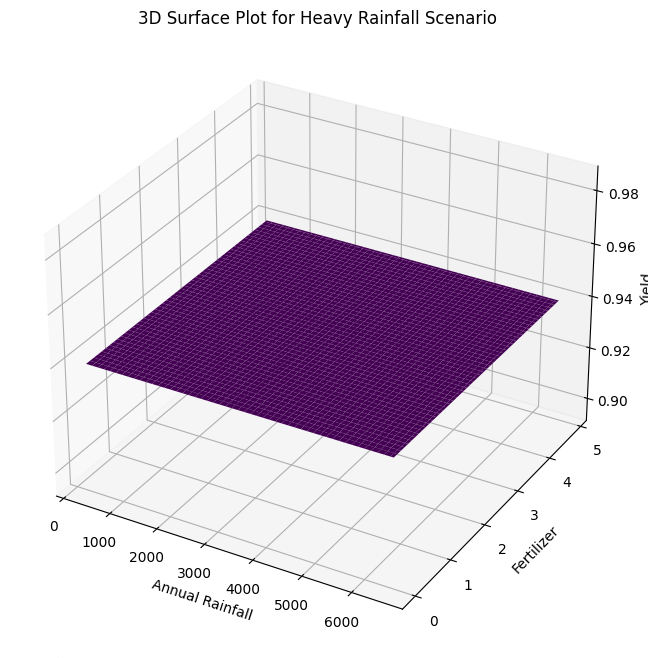

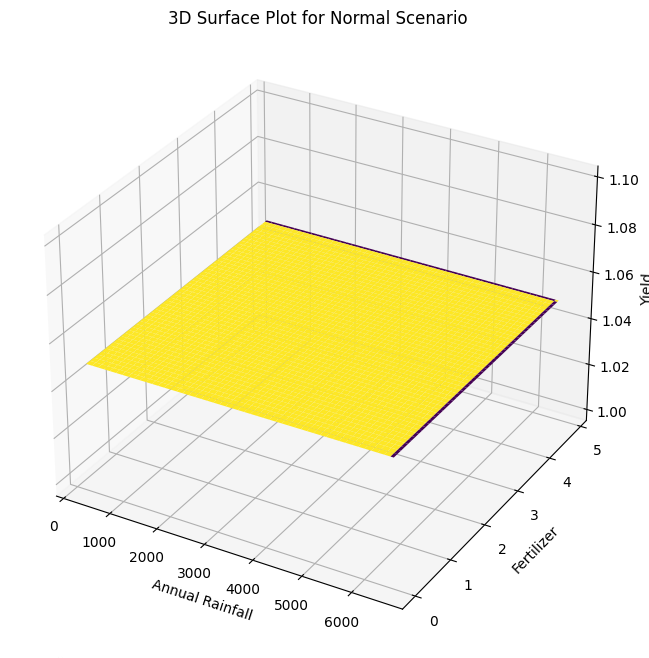

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Define scenarios
scenarios = {
    'Drought': {'Annual_Rainfall': data['Annual_Rainfall'].min() * 0.5, 'Fertilizer': data['Fertilizer'].mean()},
    'Heavy Rainfall': {'Annual_Rainfall': data['Annual_Rainfall'].max() * 1.5, 'Fertilizer': data['Fertilizer'].mean()},
    'Normal': {'Annual_Rainfall': data['Annual_Rainfall'].mean(), 'Fertilizer': data['Fertilizer'].mean()}
}

# Create grid for plotting
x = np.linspace(data['Annual_Rainfall'].min(), data['Annual_Rainfall'].max(), 100)
y = np.linspace(data['Fertilizer'].min(), data['Fertilizer'].max(), 100)
X, Y = np.meshgrid(x, y)

# Loop through scenarios
for scenario, values in scenarios.items():
    annual_rainfall_scenario = np.full(X.shape, values['Annual_Rainfall'])
    fertilizer_scenario = np.full(X.shape, values['Fertilizer'])
    pesticide_mean = np.mean(data['Pesticide'])
    area_mean = np.mean(data['Area'])
    
    # Combine features into a 2D array
    X_scenario = np.stack([annual_rainfall_scenario.ravel(), 
                           fertilizer_scenario.ravel(), 
                           np.full(X.size, pesticide_mean), 
                           np.full(X.size, area_mean)], axis=1)
    
    # Convert to DataFrame
    X_scenario_df = pd.DataFrame(X_scenario, columns=['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area'])
    
    # Predict yields
    Z_scenario = model.predict(X_scenario_df)
    
    # Reshape Z_scenario
    Z_scenario = Z_scenario.reshape(X.shape)
    
    # Plot the results
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_scenario, cmap='viridis')
    ax.set_xlabel('Annual Rainfall')
    ax.set_ylabel('Fertilizer')
    ax.set_zlabel('Yield')
    ax.set_title(f'3D Surface Plot for {scenario} Scenario')
    plt.show()

In [35]:
pip install dash

  Obtaining dependency information for dash from https://files.pythonhosted.org/packages/27/ad/7047095224013ec2ae37ba8ece5956773e7953c39a3af5aa20d821ed99aa/dash-2.17.1-py3-none-any.whl.metadata
  Obtaining dependency information for dash-html-components==2.0.0 from https://files.pythonhosted.org/packages/75/65/1b16b853844ef59b2742a7de74a598f376ac0ab581f0dcc34db294e5c90e/dash_html_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-core-components==2.0.0 from https://files.pythonhosted.org/packages/00/9e/a29f726e84e531a36d56cff187e61d8c96d2cc253c5bcef9a7695acb7e6a/dash_core_components-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for dash-table==5.0.0 from https://files.pythonhosted.org/packages/da/ce/43f77dc8e7bbad02a9f88d07bf794eaf68359df756a28bb9f2f78e255bb1/dash_table-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for retrying from https://files.pythonhosted.org/packages/8f/04/9e36f28be4c0532c0e9207ff9dc01fb

In [37]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Define scenarios
scenarios = {
    'Drought': {'Annual_Rainfall': data['Annual_Rainfall'].min() * 0.5, 'Fertilizer': data['Fertilizer'].mean()},
    'Heavy Rainfall': {'Annual_Rainfall': data['Annual_Rainfall'].max() * 1.5, 'Fertilizer': data['Fertilizer'].mean()},
    'Normal': {'Annual_Rainfall': data['Annual_Rainfall'].mean(), 'Fertilizer': data['Fertilizer'].mean()}
}

# Create grid for plotting
x = np.linspace(data['Annual_Rainfall'].min(), data['Annual_Rainfall'].max(), 100)
y = np.linspace(data['Fertilizer'].min(), data['Fertilizer'].max(), 100)
X, Y = np.meshgrid(x, y)

# Prepare interactive plots
fig = go.Figure()

for scenario, values in scenarios.items():
    annual_rainfall_scenario = np.full(X.shape, values['Annual_Rainfall'])
    fertilizer_scenario = np.full(X.shape, values['Fertilizer'])
    pesticide_mean = np.mean(data['Pesticide'])
    area_mean = np.mean(data['Area'])
    
    # Combine features into a 2D array
    X_scenario = np.stack([annual_rainfall_scenario.ravel(), 
                           fertilizer_scenario.ravel(), 
                           np.full(X.size, pesticide_mean), 
                           np.full(X.size, area_mean)], axis=1)
    
    # Convert to DataFrame
    X_scenario_df = pd.DataFrame(X_scenario, columns=['Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Area'])
    
    # Predict yields
    Z_scenario = model.predict(X_scenario_df)
    
    # Reshape Z_scenario
    Z_scenario = Z_scenario.reshape(X.shape)
    
    # Add surface plot to figure
    fig.add_trace(go.Surface(
        z=Z_scenario,
        x=X[0, :],
        y=Y[:, 0],
        name=f'{scenario} Scenario',
        showscale=False
    ))

# Update layout for interactivity
fig.update_layout(
    title='3D Surface Plot for Different Climate Scenarios',
    scene=dict(
        xaxis_title='Annual Rainfall',
        yaxis_title='Fertilizer',
        zaxis_title='Yield'
    ),
    updatemenus=[{
        'buttons': [
            {'label': 'Drought', 'method': 'update', 'args': [{'visible': [True, False, False]}]},
            {'label': 'Heavy Rainfall', 'method': 'update', 'args': [{'visible': [False, True, False]}]},
            {'label': 'Normal', 'method': 'update', 'args': [{'visible': [False, False, True]}]},
            {'label': 'All', 'method': 'update', 'args': [{'visible': [True, True, True]}]}
        ],
        'direction': 'down',
        'showactive': True
    }]
)

fig.show()


In [40]:
import joblib

# Define the path where you want to save the model
model_path = 'crop_yield_model.joblib'

# Save the model to a file
joblib.dump(best_model, model_path)

print(f'Model saved to {model_path}')

Model saved to crop_yield_model.joblib


In [41]:
import joblib

# Path to the saved model
model_path = 'crop_yield_model.joblib'

# Load the model from the file
loaded_model = joblib.load(model_path)

print('Model loaded successfully.')

Model loaded successfully.
